<a href="https://colab.research.google.com/github/yassmin1/Analytics_Projects/blob/main/RI_Police_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The objective:**
### The primary objective of the data analytics project focused on a police dataset is to derive significant insights that can drive enhancements in police management, safety protocols, and enforcement strategies. This endeavor is characterized by a commitment to meticulous analysis and data-driven decision-making, aimed at elevating the standards of law enforcement practices.
## I am exploring several key questions within this research:

* **numerical Evidence of Racial and Gender Bias**: One of our primary areas of focus is the examination of numerical evidence pertaining to racial and gender bias. We aim to delve into data and statistics to discern whether there are disparities or inequities in law enforcement interactions, arrests, or outcomes based on factors such as race and gender. Our objective is to uncover and analyze patterns, if any.  

* **Environmental Factors Impacting Police Behavior**: In this aspect, we explore the multifaceted relationship between environmental conditions, such as weather, and the conduct of police officers. We endeavor to understand how external factors like extreme heat, cold, rain, or snow can influence law enforcement responses and decision-making. By dissecting the impact of environmental variables on police actions, we seek to enhance our comprehension of the dynamic interplay between weather conditions and law enforcement behavior, ultimately contributing to more nuanced and context-aware policing strategies.

In [4]:
# Import the pandas library as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
sns.set_style("ticks")
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]


# Data sources
## https://openpolicing.stanford.edu/
## I chose Rhode Island state

# Import the datasets

In [5]:
import subprocess

def convert_rde_to_csv(input_rde_file, output_csv_file):
    """
    Converts an RDE file to CSV using an R script.

    Args:
        input_rde_file (str): Path to the input RDE file.
        output_csv_file (str): Path to the output CSV file.
    """
    # Define the R script content
    r_script = f"""
    library(readr)

    # Load the RDE file
    data <- readRDS("{input_rde_file}")

    # Convert the data to CSV and save it
    write_csv(data, "{output_csv_file}")
    """

    # Save the R script to a temporary .R file
    r_script_file = "convert_rde_to_csv.R"
    with open(r_script_file, "w") as f:
        f.write(r_script)

    try:
        # Run the R script from Python using subprocess
        subprocess.call(["Rscript", r_script_file])
        print(f"Conversion completed. CSV file saved as {output_csv_file}")
    except Exception as e:
        print(f"Error: {str(e)}")
    finally:
        # Clean up the temporary R script file
        subprocess.call(["rm", r_script_file])

# Example usage:
# convert_rde_to_csv("input.rde", "output.csv")

In [ ]:
import requests
from io import BytesIO

def download_rde_content(url):
    """
    Download the RDE file content from a URL.

    Args:
        url (str): URL of the RDE file.

    Returns:
        bytes: Content of the RDE file.
    """
    response = requests.get(url)
    if response.status_code == 200:
        return response.content
    else:
        raise Exception(f"Failed to download RDE file from {url}")

def main():
    # Specify the URL of the RDE file (replace with your URL)
    rde_url = input_state

    try:
        # Download the RDE file content
        rde_content = download_rde_content(rde_url)

        # Save the RDE content to a local file
        with open("input.rde", "wb") as f:
            f.write(rde_content)

        # Convert the local RDE file to CSV using the function
        convert_rde_to_csv("input.rde", "output.csv")

    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

In [ ]:
input_state="https://stacks.stanford.edu/filedruid:wb225bk3255/wb225bk3255_tx_san_antonio_2023_01_26.rds"
#yg821jf8611_ri_statewide_2020_04_01.rds"
#"https://stacks.stanford.edu/file/druid:wb225bk3255/wb225bk3255_tx_san_antonio_2023_01_26.rds"
#"https://stacks.stanford.edu/file/druid:wb225bk3255/wb225bk3255_tx_san_antonio_2023_01_26.csv.zip"
#https://stacks.stanford.edu/file/druid:wb225bk3255/wb225bk3255_tx_houston_2023_01_26.rds


In [ ]:
# if it is a csv file not R file
input=download_rde_content("https://stacks.stanford.edu/file/druid:wb225bk3255/wb225bk3255_tx_san_antonio_2023_01_26.csv.zip")
with open('SA.csv.zip', 'wb') as csv_file:
    csv_file.write(input)

%cp SA.csv.zip /content/drive/MyDrive/Colab\ Notebooks/Police_datasets_analytics_project/SA_state_police_data.csv

# Storing the dataset in my drive

In [7]:
# save the output.csv file in my drive

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [8]:
%cp output.csv /content/drive/MyDrive/Colab\ Notebooks/Police_datasets_analytics_project/SA_state_police_data.csv

cp: cannot stat 'output.csv': No such file or directory


# EDA

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Police_datasets_analytics_project/RI_state_police_data.csv')


<ipython-input-71-323dc74aac60>:2: DtypeWarning: Columns (6,17,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Police_datasets_analytics_project/RI_state_police_data.csv')


In [72]:
# explore the dataset
ri.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


In [73]:
ri.columns

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'reason_for_stop', 'vehicle_make', 'vehicle_model',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne', 'raw_SearchResultTwo',
       'raw_SearchResultThree'],
      dtype='object')

In [74]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509681 entries, 0 to 509680
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   raw_row_number         509681 non-null  int64 
 1   date                   509671 non-null  object
 2   time                   509671 non-null  object
 3   zone                   509671 non-null  object
 4   subject_race           480608 non-null  object
 5   subject_sex            480584 non-null  object
 6   department_id          509671 non-null  object
 7   type                   509681 non-null  object
 8   arrest_made            480608 non-null  object
 9   citation_issued        480608 non-null  object
 10  warning_issued         480608 non-null  object
 11  outcome                473840 non-null  object
 12  contraband_found       17762 non-null   object
 13  contraband_drugs       15988 non-null   object
 14  contraband_weapons     11795 non-null   object
 15  

In [75]:
ri.describe(include='object').T

,count,unique,top,freq
date,509671,3809,2006-05-21,302
time,509671,1440,10:00:00,1763
zone,509671,6,X4,135349
subject_race,480608,5,white,344734
subject_sex,480584,2,male,349446
department_id,509671,75,500,122945
type,509681,1,vehicular,509681
arrest_made,480608,2,False,464005
citation_issued,480608,2,True,428388
warning_issued,480608,2,False,451759


In [76]:
ri.rename(columns={'violation':'reason_for_stop'},inplace=True)

In [77]:
ri.reason_for_stop.value_counts()

Speeding                            268744
Other Traffic Violation              90234
Equipment/Inspection Violation       61252
Registration Violation               19830
Seatbelt Violation                   16327
Special Detail/Directed Patrol       13642
Call for Service                      7609
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               990
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: reason_for_stop, dtype: int64

In [78]:

# Count the number of missing values in each column
print(ri.isnull().sum())

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

In [79]:
ri.shape

(509681, 31)

In [80]:
cond=ri.isna().sum() >= ri.shape[0]*90/100
col_to_drop=cond.index[cond].tolist()
print(col_to_drop)

['contraband_found', 'contraband_drugs', 'contraband_weapons', 'contraband_alcohol', 'contraband_other', 'search_basis', 'reason_for_search', 'raw_SearchResultOne', 'raw_SearchResultTwo', 'raw_SearchResultThree']


In [81]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['subject_sex'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isna().sum())

# Examine the shape of the DataFrame
print(ri.shape)

raw_row_number                0
date                          0
time                          0
zone                          0
subject_race                  0
subject_sex                   0
department_id                 0
type                          0
arrest_made                   0
citation_issued               0
warning_issued                0
outcome                    6763
contraband_found         462822
contraband_drugs         464596
contraband_weapons       468789
contraband_alcohol       479367
contraband_other         462822
frisk_performed               0
search_conducted              0
search_basis             462822
reason_for_search        462822
reason_for_stop               0
vehicle_make             162525
vehicle_model            250553
raw_BasisForStop              0
raw_OperatorRace              0
raw_OperatorSex               0
raw_ResultOfStop              0
raw_SearchResultOne      462822
raw_SearchResultTwo      479765
raw_SearchResultThree    480416
dtype: i

In [82]:
ri.type.value_counts() # only one value

vehicular    480584
Name: type, dtype: int64

In [83]:
ri=ri[ri.type=="vehicular"]

In [84]:
todrop=ri.columns[ri.columns.str.startswith('raw_')]

In [85]:
ri.drop(columns=todrop,inplace=True)

In [86]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.arrest_made.astype(bool)

# Check the data type of 'is_arrested'
print(ri['arrest_made'].dtype)

object


In [87]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.date.str.cat(ri['time'],' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri['stop_datetime'].dtypes)

datetime64[ns]


In [88]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-11-22 11:15:00', '2005-10-01 12:20:00',
               '2005-10-01 12:30:00', '2005-10-01 12:50:00',
               '2005-10-01 13:10:00', '2005-10-01 15:50:00',
               '2005-09-11 11:45:00', '2005-09-11 11:45:00',
               '2005-10-04 11:55:00', '2005-10-04 11:55:00',
               ...
               '2015-12-29 13:28:00', '2015-12-27 12:45:00',
               '2015-12-27 13:43:00', '2015-12-28 02:29:00',
               '2015-12-30 11:42:00', '2015-08-16 13:37:00',
               '2015-08-04 10:40:00', '2015-12-20 11:17:00',
               '2015-11-09 23:35:00', '2015-10-30 11:09:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)
Index(['date', 'time', 'zone', 'subject_race', 'subject_sex', 'department_id',
       'type', 'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'contraband_found', 'contraband_drugs', 'contraband_weapons',
       'contraband_alcohol', 'contraband_other', 'frisk_pe

# Count the unique values in 'violation'
print(ri['reason_for_stop'].value_counts())
reasons=ri['reason_for_stop'].value_counts()
reasons[reasons>100]

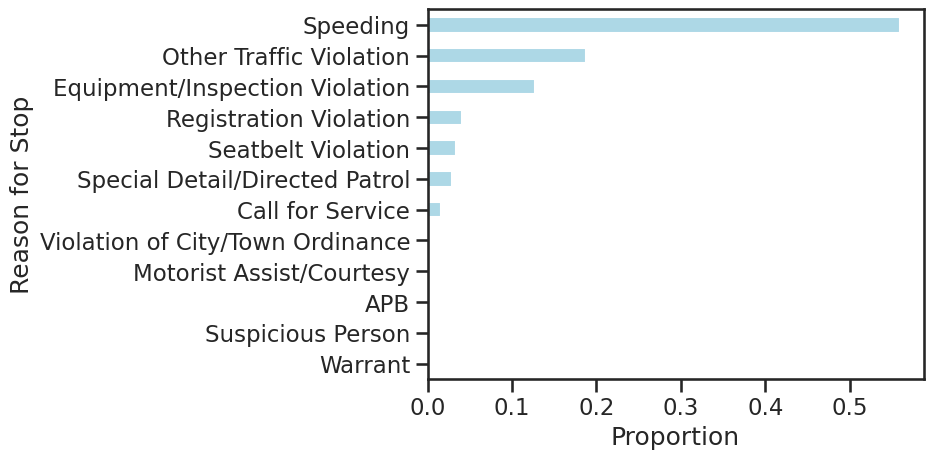

In [28]:
ax=ri['reason_for_stop'].value_counts(normalize=True,ascending=True).plot.barh(color='lightblue')
plt.xlabel('Proportion')
plt.ylabel('Reason for Stop')
#plt.tight_layout()
plt.show()

0.5 0.7271278278094985
0.5 0.2728721721905016


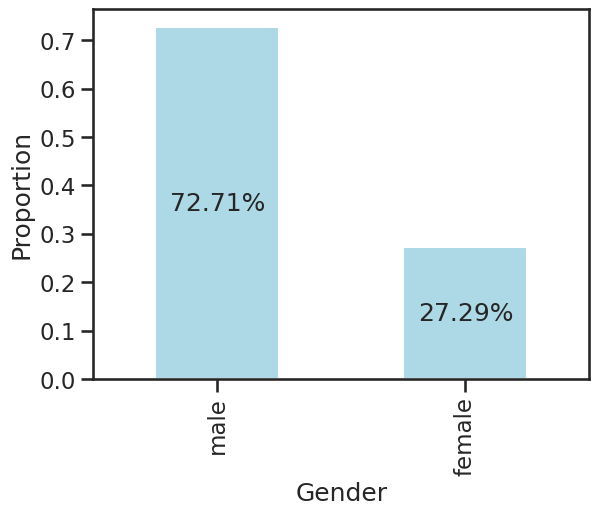

In [29]:
# Count the values in 'race'
ax=ri['subject_sex'].value_counts(normalize=True).plot.bar(color='lightblue')
plt.ylabel('Proportion')
plt.xlabel('Gender')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    print(width, height)
    x, y = p.get_xy()
    plt.text(x+width/2, y+height/2, '{:1.2f}%'.format(height*100), ha='center', va='center')

#plt.tight_layout()
plt.show()

### **Insight**: The dataset has 72% male and 27% female

In [30]:
# Create a DataFrame of female drivers
female = ri[ri['subject_sex']=='female']

# Create a DataFrame of male drivers
male = ri[ri['subject_sex']=='male']
# Compute the violations by female drivers (as proportions)
print(female['reason_for_stop'].value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male['reason_for_stop'].value_counts(normalize=True))

Speeding                            0.657308
Other Traffic Violation             0.136581
Equipment/Inspection Violation      0.107055
Registration Violation              0.043077
Seatbelt Violation                  0.027071
Call for Service                    0.018057
Special Detail/Directed Patrol      0.005071
Motorist Assist/Courtesy            0.002532
Violation of City/Town Ordinance    0.001647
APB                                 0.000831
Suspicious Person                   0.000564
Warrant                             0.000206
Name: reason_for_stop, dtype: float64
Speeding                            0.522364
Other Traffic Violation             0.206948
Equipment/Inspection Violation      0.135102
Registration Violation              0.040581
Special Detail/Directed Patrol      0.037136
Seatbelt Violation                  0.036555
Call for Service                    0.014987
Violation of City/Town Ordinance    0.002347
Motorist Assist/Courtesy            0.001880
APB              

In [31]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri['subject_sex']=='female') & (ri['reason_for_stop']=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding =ri[(ri['subject_sex']=='male') & (ri['reason_for_stop']=='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding['outcome'].value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding['outcome'].value_counts(normalize=True))


citation    0.954609
warning     0.039059
arrest      0.006332
Name: outcome, dtype: float64
citation    0.946763
warning     0.036167
arrest      0.017070
Name: outcome, dtype: float64


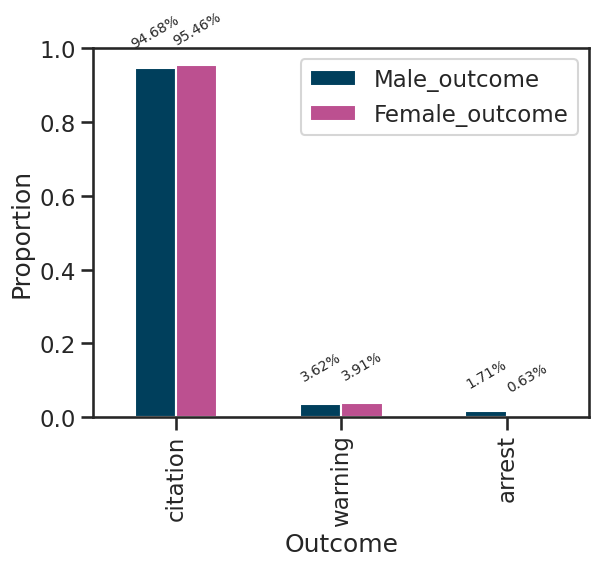

In [107]:
ax=pd.concat([male_and_speeding['outcome'].value_counts(normalize=True).rename('Male_outcome'),female_and_speeding['outcome'].value_counts(normalize=True).rename('Female_outcome')],axis='columns',names=['Male','Female']).plot.bar(color=['#003f5c', '#bc5090'])
plt.ylabel('Proportion')
plt.xlabel('Outcome')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    #print(width, height)
    x, y = p.get_xy()
    plt.text(x+width/2, y+height+0.1, '{:1.2f}%'.format(height*100), ha='center', va='center',fontsize=10,rotation=30)

#plt.tight_layout()
plt.show()

##**Insight**: prompt: wirte me insight from the figure

The figure shows the stop outcomes for male and female drivers who were stopped for speeding. The proportion of female drivers who were stopped and released is higher than the proportion of male drivers who were stopped and released. This suggests that female drivers are more likely to be stopped and released than male drivers.
The proportion of female drivers who were stopped and arrested is lower than the proportion of male drivers who were stopped and arrested. This suggests that female drivers are less likely to be stopped and arrested than male drivers.
The proportion of female drivers who were stopped and issued a citation is higher than the proportion of male drivers who were stopped and issued a citation. This suggests that female drivers are more likely to be stopped and issued a citation than male drivers.    
Overall, the figure suggests that female drivers are more likely to be stopped and released, less likely to be stopped and arrested, and more likely to be stopped and issued a citation than male drivers.

## Search Conducted

bool
False    0.963041
True     0.036959
Name: search_conducted, dtype: float64
0.036959199640437465
0.5 0.9630408003595625
0.5 0.036959199640437465


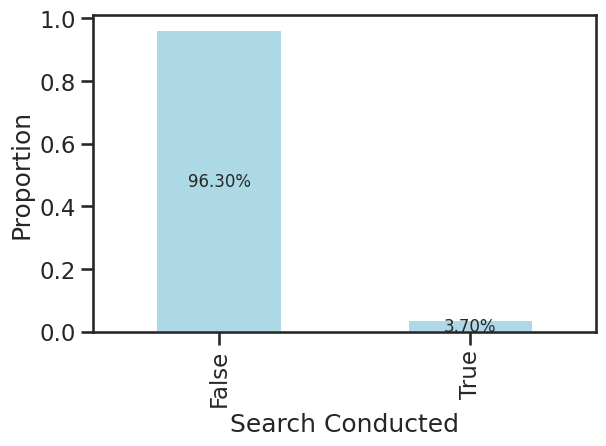

In [33]:
# Check the data type of 'search_conducted'
print(ri['search_conducted'].dtypes)

# Calculate the search rate by counting the values
print(ri['search_conducted'].value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri['search_conducted'].mean())
ax=ri['search_conducted'].value_counts(normalize=True).plot(kind='bar',color='lightblue')
plt.ylabel('Proportion')
plt.xlabel('Search Conducted')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    print(width, height)
    x, y = p.get_xy()
    plt.text(x+width/2, y+height/2, '{:1.2f}%'.format(height*100), ha='center', va='center',fontsize=12)

plt.tight_layout()
plt.show()

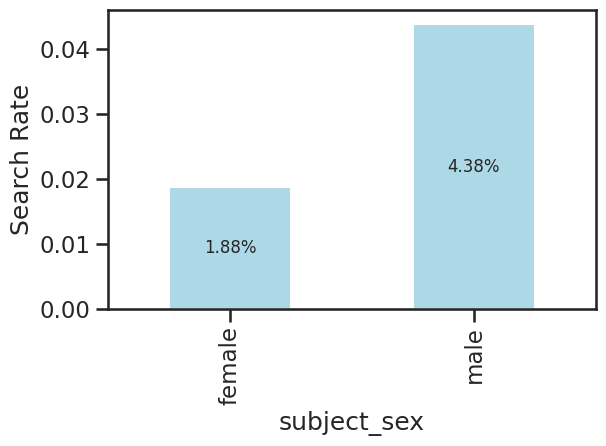

subject_sex
female    0.018751
male      0.043792
Name: search_conducted, dtype: float64


In [34]:
# Calculate the search rate for both groups simultaneously
ax=ri.groupby('subject_sex').search_conducted.mean().plot.bar(color='lightblue')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    #print(width, height)
    x, y = p.get_xy()
    plt.text(x+width/2, y+height/2, '{:1.2f}%'.format(height*100), ha='center', va='center',fontsize=12)
plt.ylabel('Search Rate')
plt.tight_layout()
plt.show()
print(ri.groupby('subject_sex').search_conducted.mean())

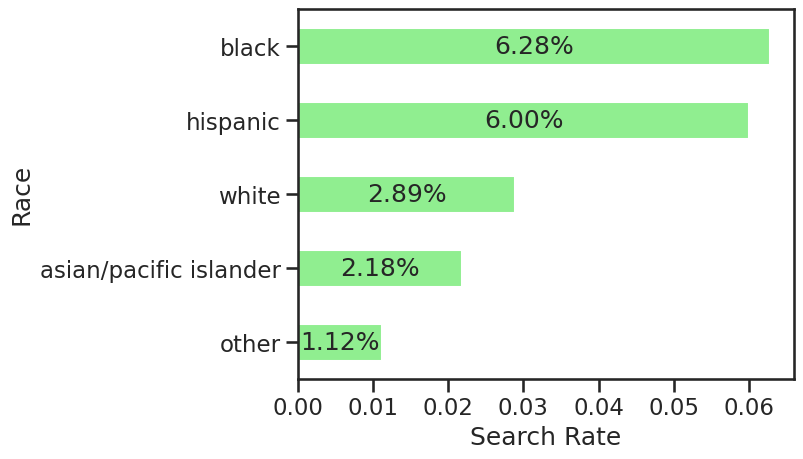

In [35]:
# Calculate the search rate for race groups
ax=ri.groupby('subject_race').search_conducted.mean().sort_values().plot.barh(color='lightgreen')
plt.xlabel('Search Rate')
plt.ylabel('Race')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    #print(width, height)
    x, y = p.get_xy()
    plt.text(x+width/2, y+height/2, '{:1.2f}%'.format(width*100), ha='center', va='center')
#plt.tight_layout()
plt.show()


##**Insight**: The figure shows the search rate for different race groups. The search rate for Black drivers is the highest, followed by Hispanic drivers, then White drivers, and finally Asian drivers. This suggests that Black drivers are more likely to be searched than other race groups.


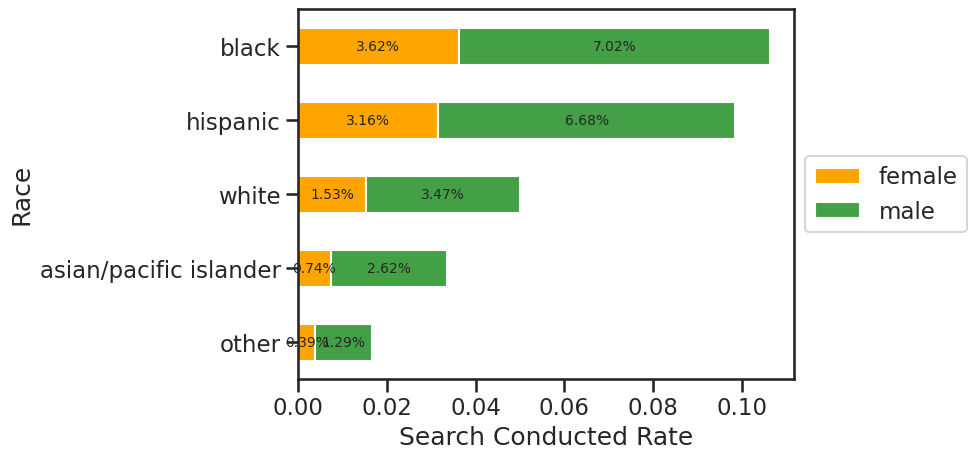

In [36]:
# Calculate the search rate for race groups
ax=ri.groupby(['subject_race','subject_sex']).search_conducted.mean().unstack().sort_values(by='male').plot(kind='barh',color=[ '#ffa500', '#43a047'],
                                                                                  stacked=True)
plt.xlabel('Search Conducted Rate')
plt.ylabel('Race')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    #print(width, height)
    x, y = p.get_xy()
    plt.text(x+width/2, y+height/2, '{:1.2f}%'.format(width*100), ha='center', va='center',fontsize=10)
#plt.tight_layout()
plt.show()

##**Insight**:
* The figure shows the search rate for different race groups and
genders. The search rate for Black males is the highest, followed by Hispanic males, then White males, and finally Asian males. The search rate for Black females is the second highest, followed by Hispanic females, then White females, and finally Asian females. This suggests that Black drivers, regardless of gender, are more likely to be searched than other race groups.


### Conviction analysis

In [37]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby(['subject_sex','reason_for_stop']).search_conducted.mean())

subject_sex  reason_for_stop                 
female       APB                                 0.165138
             Call for Service                    0.042230
             Equipment/Inspection Violation      0.040245
             Motorist Assist/Courtesy            0.033133
             Other Traffic Violation             0.038021
             Registration Violation              0.054700
             Seatbelt Violation                  0.017746
             Special Detail/Directed Patrol      0.018045
             Speeding                            0.007738
             Suspicious Person                   0.216216
             Violation of City/Town Ordinance    0.060185
             Warrant                             0.148148
male         APB                                 0.255319
             Call for Service                    0.092419
             Equipment/Inspection Violation      0.070916
             Motorist Assist/Courtesy            0.089802
             Other Traffic

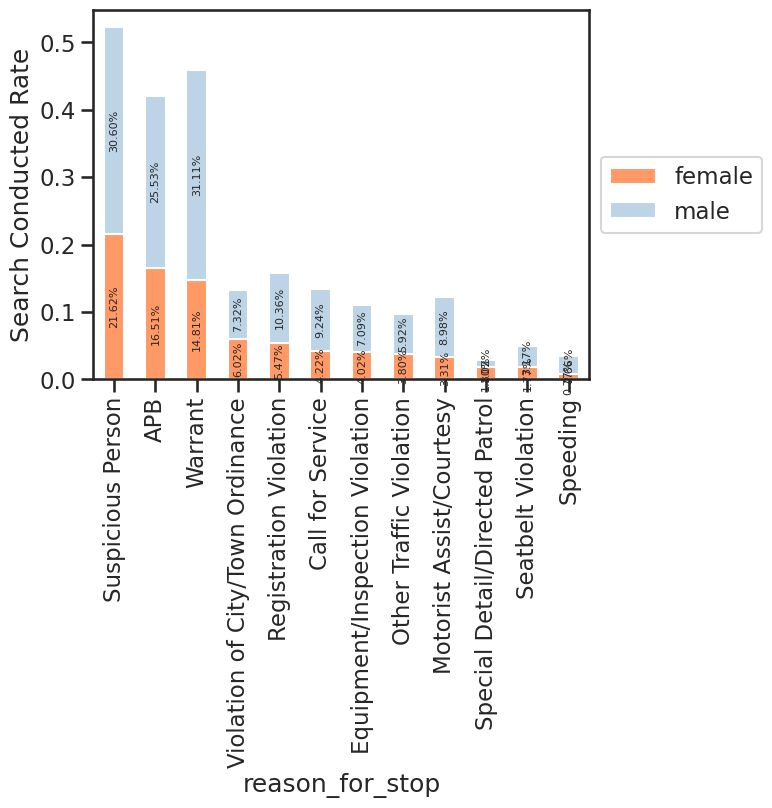

In [38]:
ax=ri.groupby(['subject_sex','reason_for_stop']).search_conducted.mean().unstack().T.sort_values(by='female',ascending=False).plot.bar(stacked=True,color=['#ff9966','#bcd4e6'])
plt.ylabel('Search Conducted Rate')
plt.xlabel('reason_for_stop')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    #print(width, height)
    x, y = p.get_xy()
    plt.text(x+width/2, y+height/2, '{:1.2f}%'.format(height*100), ha='center', va='center',fontsize=8,rotation=90)

plt.show()


## **Insights**:
* The search rate for drivers who are stopped for Suspicious person is higher than the search rate for drivers who are stopped for other reasons.
* More likely for men to be searched when they stopped for wannant/speed/seatbelt than women.



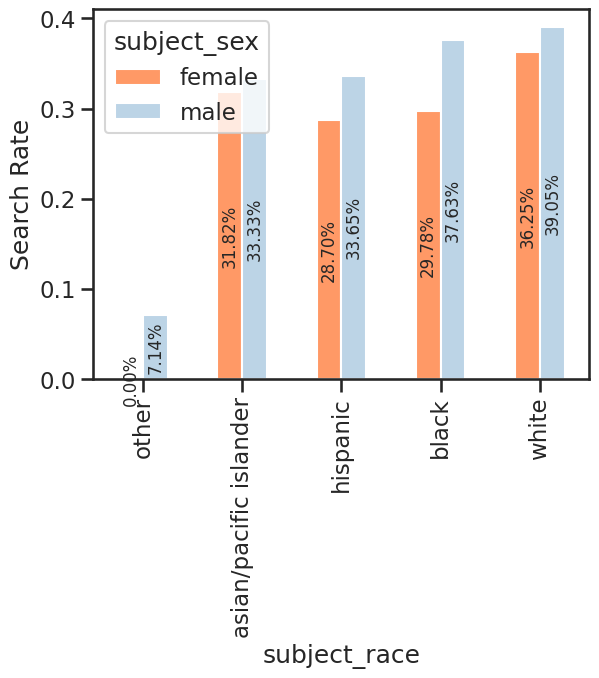

In [39]:
# Calculate the search rate for race groups that after the search contraband was found
ax=ri[ri.search_conducted == True].groupby(['subject_race','subject_sex']).contraband_found.mean().unstack().sort_values(by='male').plot(kind='bar',color={'female':'#ff9966','male':'#bcd4e6'})
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    #print(width, height)
    x, y = p.get_xy()
    plt.text(x+width/2, y+height/2, '{:1.2f}%'.format(height*100), ha='center', va='center',fontsize=12,rotation=90)
plt.ylabel('Search Rate')
#plt.tight_layout()
plt.show()


In [40]:
# the rate of frisk and arrested
# Check the data type of 'frisk'
frisky=(ri['frisk_performed']==True) & (ri['search_conducted']==True)

# Take the sum of 'frisk'
print(f"The Frisk Rate when the search conducted is {ri.loc[frisky,'arrest_made'].mean()}")

The Frisk Rate when the search conducted is 0.3325466638060502


In [41]:
searched_frisk=ri.loc[frisky]

# Calculate the frisk rate for each gender and arrested
print(searched_frisk.groupby('subject_sex')['is_arrested'].mean())

subject_sex
female    0.329619
male      0.332929
Name: is_arrested, dtype: float64


## Insights
*  33% of people who's been searched they Frisked as well.
*  33% of men and 32% women was arrested after the firsk.

In [42]:
# Calculate the overall arrest rate
print(f"The Overall Arrest Rate={ri['is_arrested'].mean()}")

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour)['is_arrested'].mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

The Overall Arrest Rate=0.03454755048024903
stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64


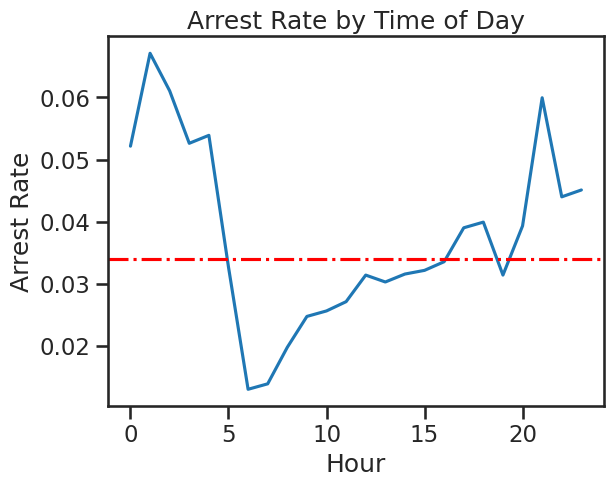

In [43]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot.line()
plt.axhline(0.034,color='red',linestyle='-.')
# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

In [44]:
# Calculate the hourly arrest rate
print(f"Hourly Arrest Rate={ri.groupby(ri.index.hour)['is_arrested'].mean().mean()}")

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.day)['is_arrested'].mean()

Hourly Arrest Rate=0.03753015992734036


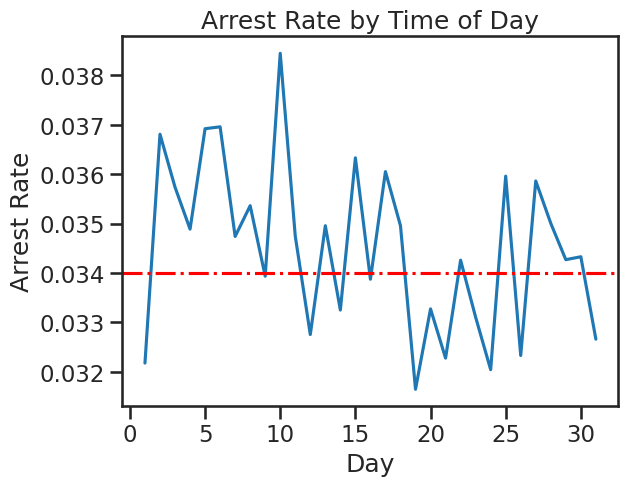

In [45]:
hourly_arrest_rate.plot(kind='line')
plt.axhline(0.034,color='red',linestyle='-.')
# Add the xlabel, ylabel, and title
plt.xlabel('Day')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

stop_datetime
2005    0.068289
2006    0.043491
2007    0.030176
2008    0.028089
2009    0.038398
2010    0.038616
2011    0.035538
2012    0.035124
2013    0.029316
2014    0.027374
2015    0.028607
Name: is_arrested, dtype: float64


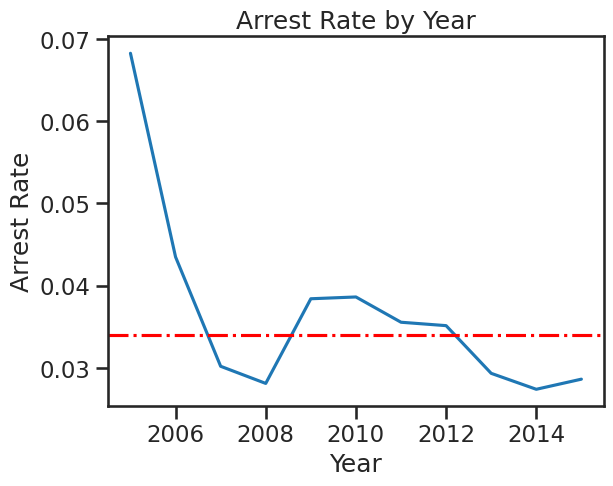

In [46]:
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.year)['is_arrested'].mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.year)['is_arrested'].mean().plot.line()
plt.axhline(0.034,color='red',linestyle='-.')
# Add the xlabel, ylabel, and title
plt.xlabel('Year')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Year')

# Display the plot
plt.show()


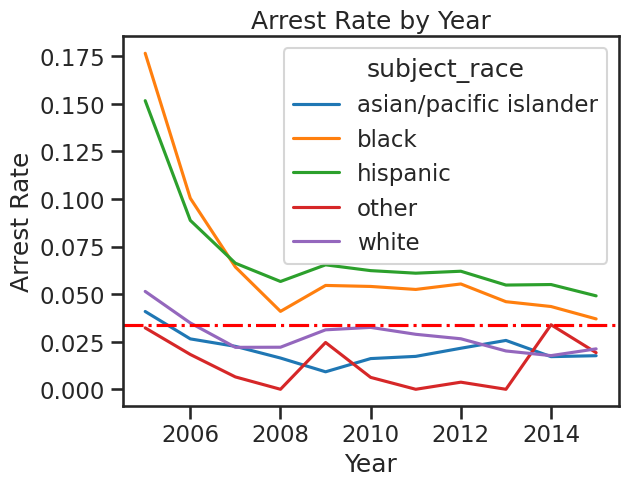

In [47]:
# Save the hourly arrest rate
year_arrest_rate = ri.groupby([ri.index.year,'subject_race'])['is_arrested'].mean().unstack().plot.line()
plt.axhline(0.034,color='red',linestyle='-.')
# Add the xlabel, ylabel, and title
plt.xlabel('Year')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Year')

# Display the plot
plt.show()

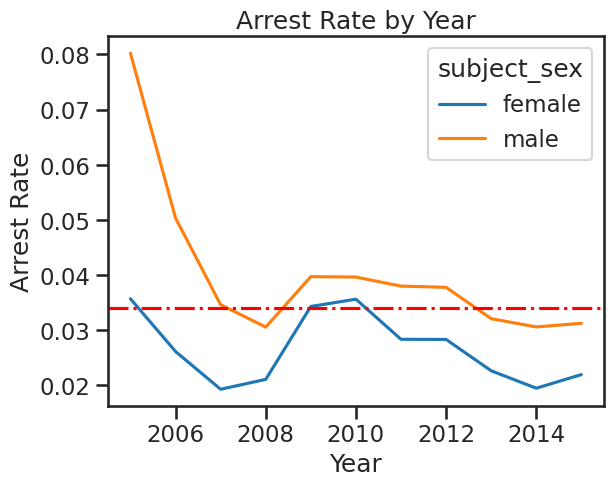

In [48]:
# Save the hourly arrest rate
year_arrest_rate = ri.groupby([ri.index.year,'subject_sex'])['is_arrested'].mean().unstack().plot.line()
plt.axhline(0.034,color='red',linestyle='-.')
# Add the xlabel, ylabel, and title
plt.xlabel('Year')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Year')

# Display the plot
plt.show()

##**Insights**:
* The arrest rate is highest between 10pm and 3am, and lowest between 6am and 10am. This is likely due to the fact that more people are out and about during the evening and night, and therefore more likely to be stopped by the police.     
* The arrest rate is also higher on weekends than on weekdays, which is likely due to the fact that people are more likely to be out and about on weekends.    
* The arrest rate has been declining over the past few years, which is likely due to a number of factors, including increased police training and awareness of racial profiling.
* However, the arrest rate is still higher for black drivers than for white drivers, which suggests that racial profiling is still a problem.



In [49]:
# Rate of finding drugs when the search conducted

stop_datetime
2005-12-31    0.177033
2006-12-31    0.193582
2007-12-31    0.225240
2008-12-31    0.217172
2009-12-31    0.238669
2010-12-31    0.270270
2011-12-31    0.329939
2012-12-31    0.349971
2013-12-31    0.445837
2014-12-31    0.467683
2015-12-31    0.433484
Freq: A-DEC, Name: contraband_drugs, dtype: float64


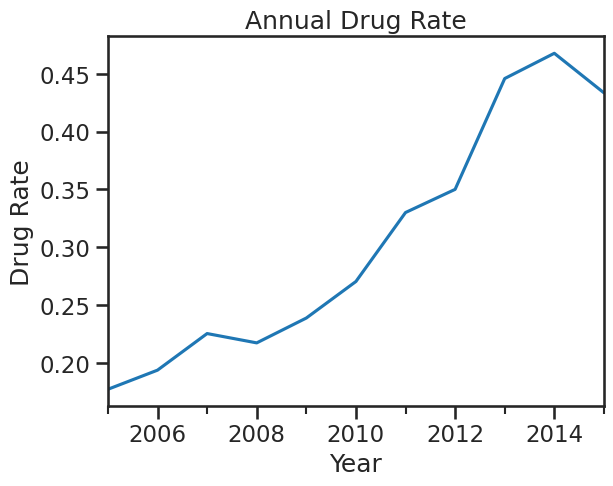

In [50]:
# Calculate the annual rate of drug-related stops
print(ri[ri.search_conducted==True].contraband_drugs.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate =ri[ri.search_conducted==True].contraband_drugs.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Drug Rate')
plt.title('Annual Drug Rate')

# Display the plot
plt.show()

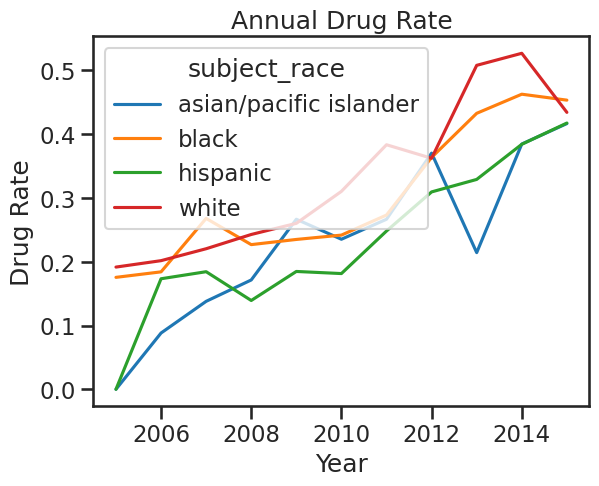

In [51]:
search_drug=ri[(ri.search_conducted==True)]
search_drug.groupby([search_drug.index.year,'subject_race'])['contraband_drugs'].mean().unstack().drop('other',axis=1).plot.line()
plt.xlabel('Year')
plt.ylabel('Drug Rate')
plt.title('Annual Drug Rate')

# Display the plot
plt.show()

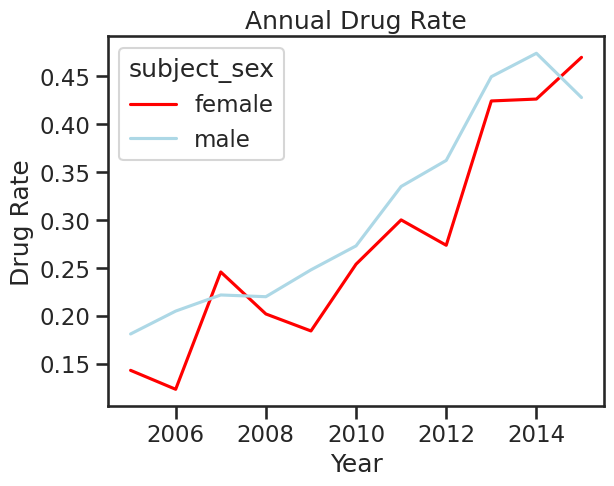

In [52]:
search_drug.groupby([search_drug.index.year,'subject_sex'])['contraband_drugs'].mean().unstack().plot.line(color={'female':'red','male':'lightblue'})
plt.xlabel('Year')
plt.ylabel('Drug Rate')
plt.title('Annual Drug Rate')

# Display the plot
plt.show()

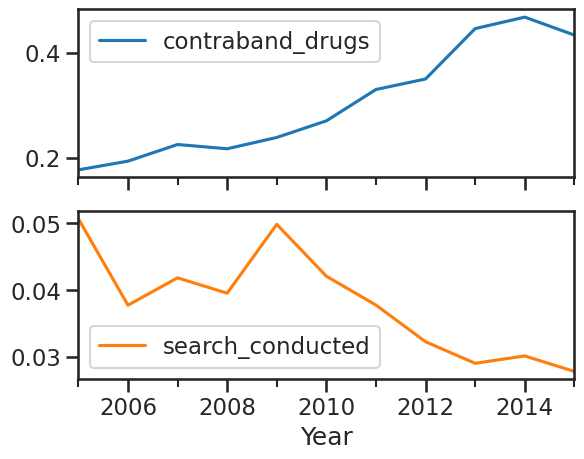

In [53]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(kind='line',subplots=True)
#
plt.xlabel('Year')
# Display the subplots
plt.show()

##**Insight**
* The rate of finding drugs when the search conducted is higher for white drivers than for othher drivers rom 2012 till2014 where balck driver start to decrease.

* The annual drug rate has been increase over the past few years, whough the searching rate was decreased
that mean that drugs consuming increazing.  


In [54]:
# Create
print(pd.crosstab(ri.zone,ri.reason_for_stop))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.zone,ri.reason_for_stop)
# Select rows 'Zone K1' through 'Zone K3'
#print(all_zones.loc['K1':'x4'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['K1':'x4']

reason_for_stop  APB  Call for Service  Equipment/Inspection Violation  \
zone                                                                     
K1                32               281                            3786   
K2               101              1036                           11285   
K3               144              1227                           12959   
X1                 6               198                            1725   
X3                64              1328                           11520   
X4               138              3535                           19975   

reason_for_stop  Motorist Assist/Courtesy  Other Traffic Violation  \
zone                                                                 
K1                                     78                     7127   
K2                                    118                    16440   
K3                                    258                    16218   
X1                                     33                

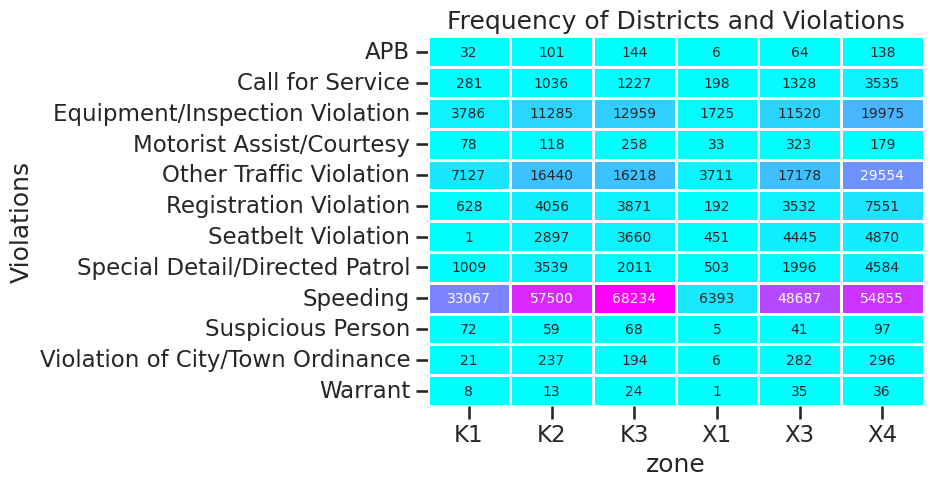

In [55]:
# Create a bar plot of 'k_zones'
sns.heatmap(k_zones.T,cmap='cool',linewidths=1,annot=True,cbar=False,fmt="1.0f",annot_kws={'fontsize':10})
plt.title('Frequency of Districts and Violations')
plt.ylabel('Violations')
# Display the plot
plt.show()


##**Insight**:  
* The heatmap shows the frequency of each violation in each zone. The darker the color, the more frequent the violation.  

* The most common violation in all zones is "Speeding". The second most common violation is "Equipment/ Inspection Violation". The third most common violation is "Other Traffic Violation".
* X1 Zone is the least zone effected by violations.



#The weather Effect on Ploice Activity

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


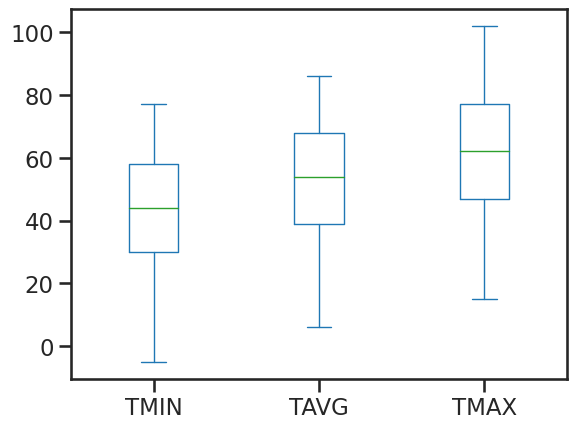

In [56]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Police_datasets_analytics_project/weather_RI.csv')

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


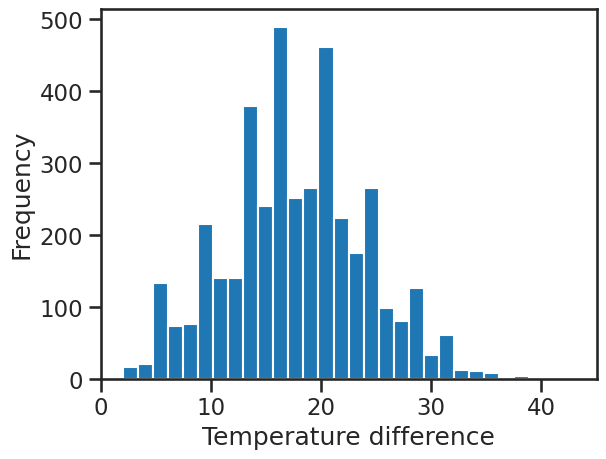

In [57]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF']=weather['TMAX']-weather['TMIN']

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather['TDIFF'].plot(kind='hist',bins=30)
plt.xlabel('Temperature difference')
# Display the plot
plt.show()

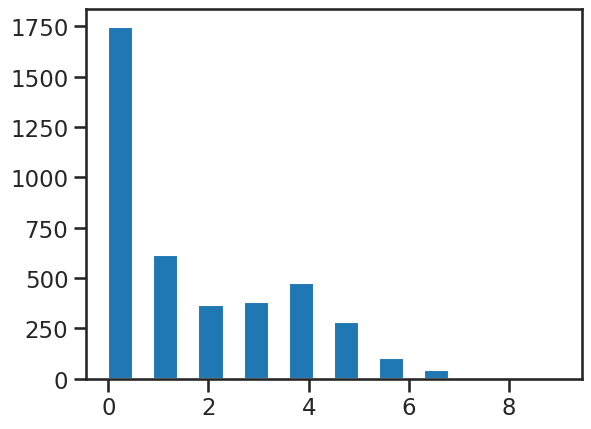

In [58]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
plt.hist(weather['bad_conditions'],width=0.5)
,
# Display the plot
plt.show()


In [59]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


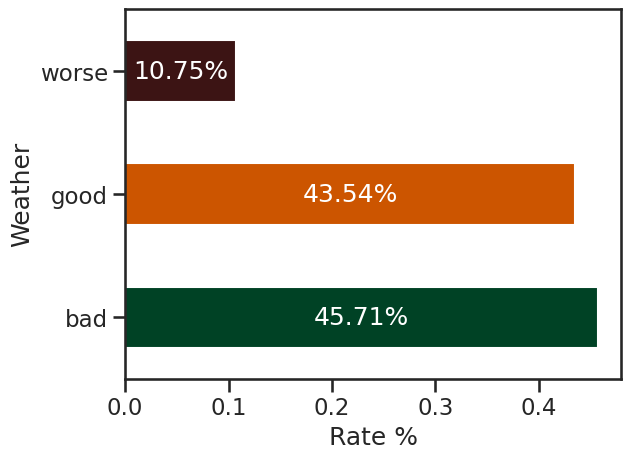

In [60]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good', 'bad', 'worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
ax=weather['rating'].value_counts(normalize=True).plot(kind='barh',color=["#004225",'#cc5500','#3c1414'])
plt.ylabel('Weather')
plt.xlabel('Rate %')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    #print(width, height)
    x, y = p.get_xy()
    plt.text(x+width/2, y+height/2, '{:1.2f}%'.format(width*100), ha='center', va='center',fontdict={'color':'white'})
#plt.tight_layout()
plt.show()

In [61]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())


        stop_datetime        date      time zone subject_race subject_sex  \
0 2005-11-22 11:15:00  2005-11-22  11:15:00   X3        white        male   
1 2005-10-01 12:20:00  2005-10-01  12:20:00   X3        white        male   
2 2005-10-01 12:30:00  2005-10-01  12:30:00   X3        white      female   
3 2005-10-01 12:50:00  2005-10-01  12:50:00   X3        white        male   
4 2005-10-01 13:10:00  2005-10-01  13:10:00   X3        white      female   

  department_id       type arrest_made citation_issued  ...  \
0           200  vehicular       False            True  ...   
1           200  vehicular       False            True  ...   
2           200  vehicular       False            True  ...   
3           200  vehicular       False            True  ...   
4           200  vehicular       False            True  ...   

  contraband_alcohol contraband_other frisk_performed search_conducted  \
0                NaN              NaN           False            False   
1         

In [62]:

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating=weather[['DATE','rating']]
weather_rating['DATE']=pd.to_datetime(weather['DATE'])
# Examine the head of 'weather_rating'
print(weather_rating.dtypes)

DATE      datetime64[ns]
rating          category
dtype: object


<ipython-input-62-b6a62fadd225>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_rating['DATE']=pd.to_datetime(weather['DATE'])


In [63]:

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_datetime', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(480584, 27)


In [64]:
ri_weather.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,warning_issued,...,frisk_performed,search_conducted,search_basis,reason_for_search,reason_for_stop,vehicle_make,vehicle_model,is_arrested,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-11-22 11:15:00,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,False,...,False,False,NaN,NaN,Speeding,NaN,NaN,False,NaT,NaN
2005-10-01 12:20:00,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,False,...,False,False,NaN,NaN,Speeding,NaN,NaN,False,NaT,NaN
2005-10-01 12:30:00,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,False,...,False,False,NaN,NaN,Speeding,NaN,NaN,False,NaT,NaN
2005-10-01 12:50:00,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,False,...,False,False,NaN,NaN,Speeding,NaN,NaN,False,NaT,NaN
2005-10-01 13:10:00,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,False,...,False,False,NaN,NaN,Speeding,NaN,NaN,False,NaT,NaN


In [65]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['reason_for_stop','rating'])['is_arrested'].mean())

reason_for_stop                   rating
APB                               good      0.000000
                                  bad       1.000000
                                  worse          NaN
Call for Service                  good      0.000000
                                  bad       0.000000
                                  worse     1.000000
Equipment/Inspection Violation    good      0.120000
                                  bad       0.142857
                                  worse     0.058824
Motorist Assist/Courtesy          good           NaN
                                  bad       0.000000
                                  worse          NaN
Other Traffic Violation           good      0.105263
                                  bad       0.177419
                                  worse     0.272727
Registration Violation            good      0.066667
                                  bad       0.111111
                                  worse     0.000000
Seatb

In [66]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['reason_for_stop', 'rating']).is_arrested.mean()

In [67]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())



rating                                good       bad     worse
reason_for_stop                                               
APB                               0.000000  1.000000       NaN
Call for Service                  0.000000  0.000000  1.000000
Equipment/Inspection Violation    0.120000  0.142857  0.058824
Motorist Assist/Courtesy               NaN  0.000000       NaN
Other Traffic Violation           0.105263  0.177419  0.272727
Registration Violation            0.066667  0.111111  0.000000
Seatbelt Violation                0.200000  0.333333       NaN
Special Detail/Directed Patrol    0.000000  0.000000  0.000000
Speeding                          0.032710  0.023810  0.015625
Suspicious Person                      NaN       NaN       NaN
Violation of City/Town Ordinance       NaN  0.000000       NaN
Warrant                                NaN       NaN       NaN


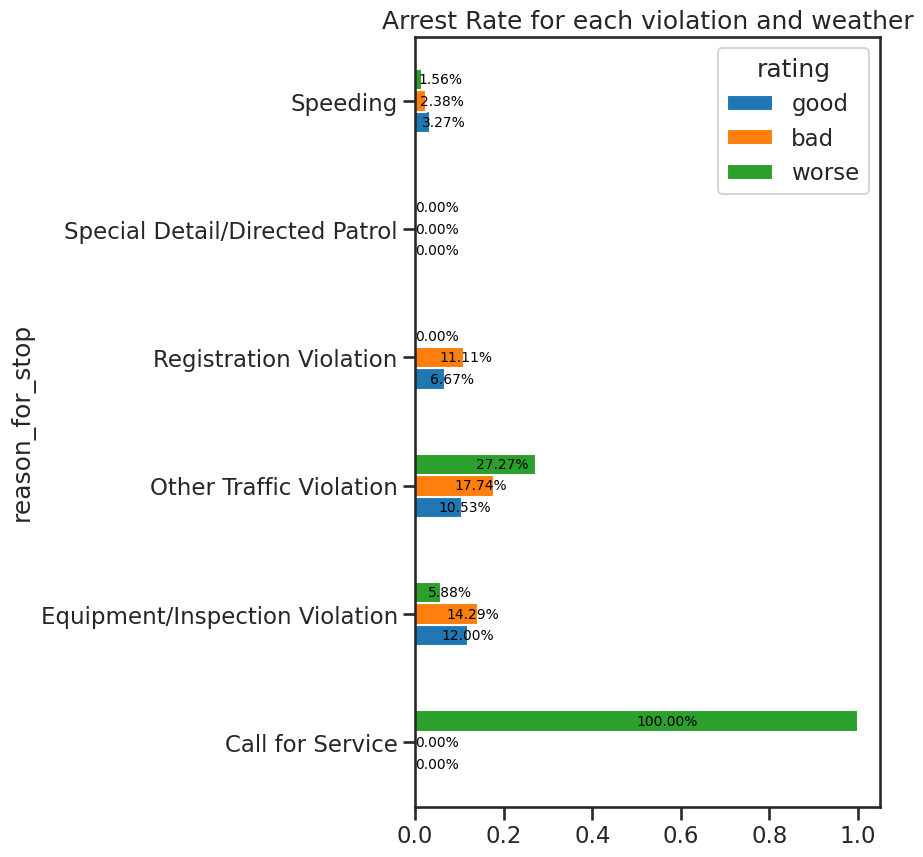

In [68]:
import numpy as np
ax=arrest_rate.unstack().replace({'0',np.nan}).dropna().plot(kind='barh',figsize=(6,10))
plt.title('Arrest Rate for each violation and weather')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    #print(width, height)
    x, y = p.get_xy()
    plt.text(x+width/2, y+height/2, '{:1.2f}%'.format(width*100), ha='left', va='center',fontdict={'color':'k','fontsize':10})
#plt.tight_layout()
plt.show()

##**Insight**
* all the call for service happened in very bad weather while inspection violation accured in bad weather.
* only 1% of the arrested rate that started with speeding viloation  accured in bad weater but most of them happedned in good weather.
* The last figure shows that the arrest rate for speeding violations is much higher in good weather than in bad weather. This is likely because drivers are more likely to be speeding when the weather is good, and they are therefore more likely to be caught by the police. The arrest rate for other violations is  higher in worse weather.
